In [1]:
#code snippet 0
#setting url
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQzBYWDif8AqH47QpdaMsxZ0d3aXafgvL6EfnsUk6iN5QPCgrhvEky7hzI16iyfL3L2rfec3QX32JQj/pub?gid=0&single=true&output=csv'

In [2]:
#code snippet 1
#importing pandas and reading the data from url
import pandas as pd
df = pd.read_csv(url)
df


,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,...,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


In [3]:
#code snippet 2
#displaying columns to better understand the dataset
df.columns

Index(['DonorUniqueId', 'DonorPostalCode', 'DonorAge', 'MaritalStatus',
       'GenderIdentity', 'IsMemberFlag', 'IsAlumnusFlag', 'IsParentFlag',
       'HasInvolvementFlag', 'WealthRating', 'AcademicDegreeLevel',
       'PreferredAddressType', 'HasEmailFlag', 'ConsecutiveDonorYears',
       'LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
       'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
       'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation',
       'CumulativeDonationAmount', 'DonorDateOfBirth', 'DonorIndicatorFlag.'],
      dtype='object')

In [4]:
#code snippet 3
#showing data types of each column

df.dtypes


,0
DonorUniqueId,int64
DonorPostalCode,float64
DonorAge,int64
MaritalStatus,object
GenderIdentity,object
IsMemberFlag,object
IsAlumnusFlag,object
IsParentFlag,object
HasInvolvementFlag,object
WealthRating,object


<Axes: >

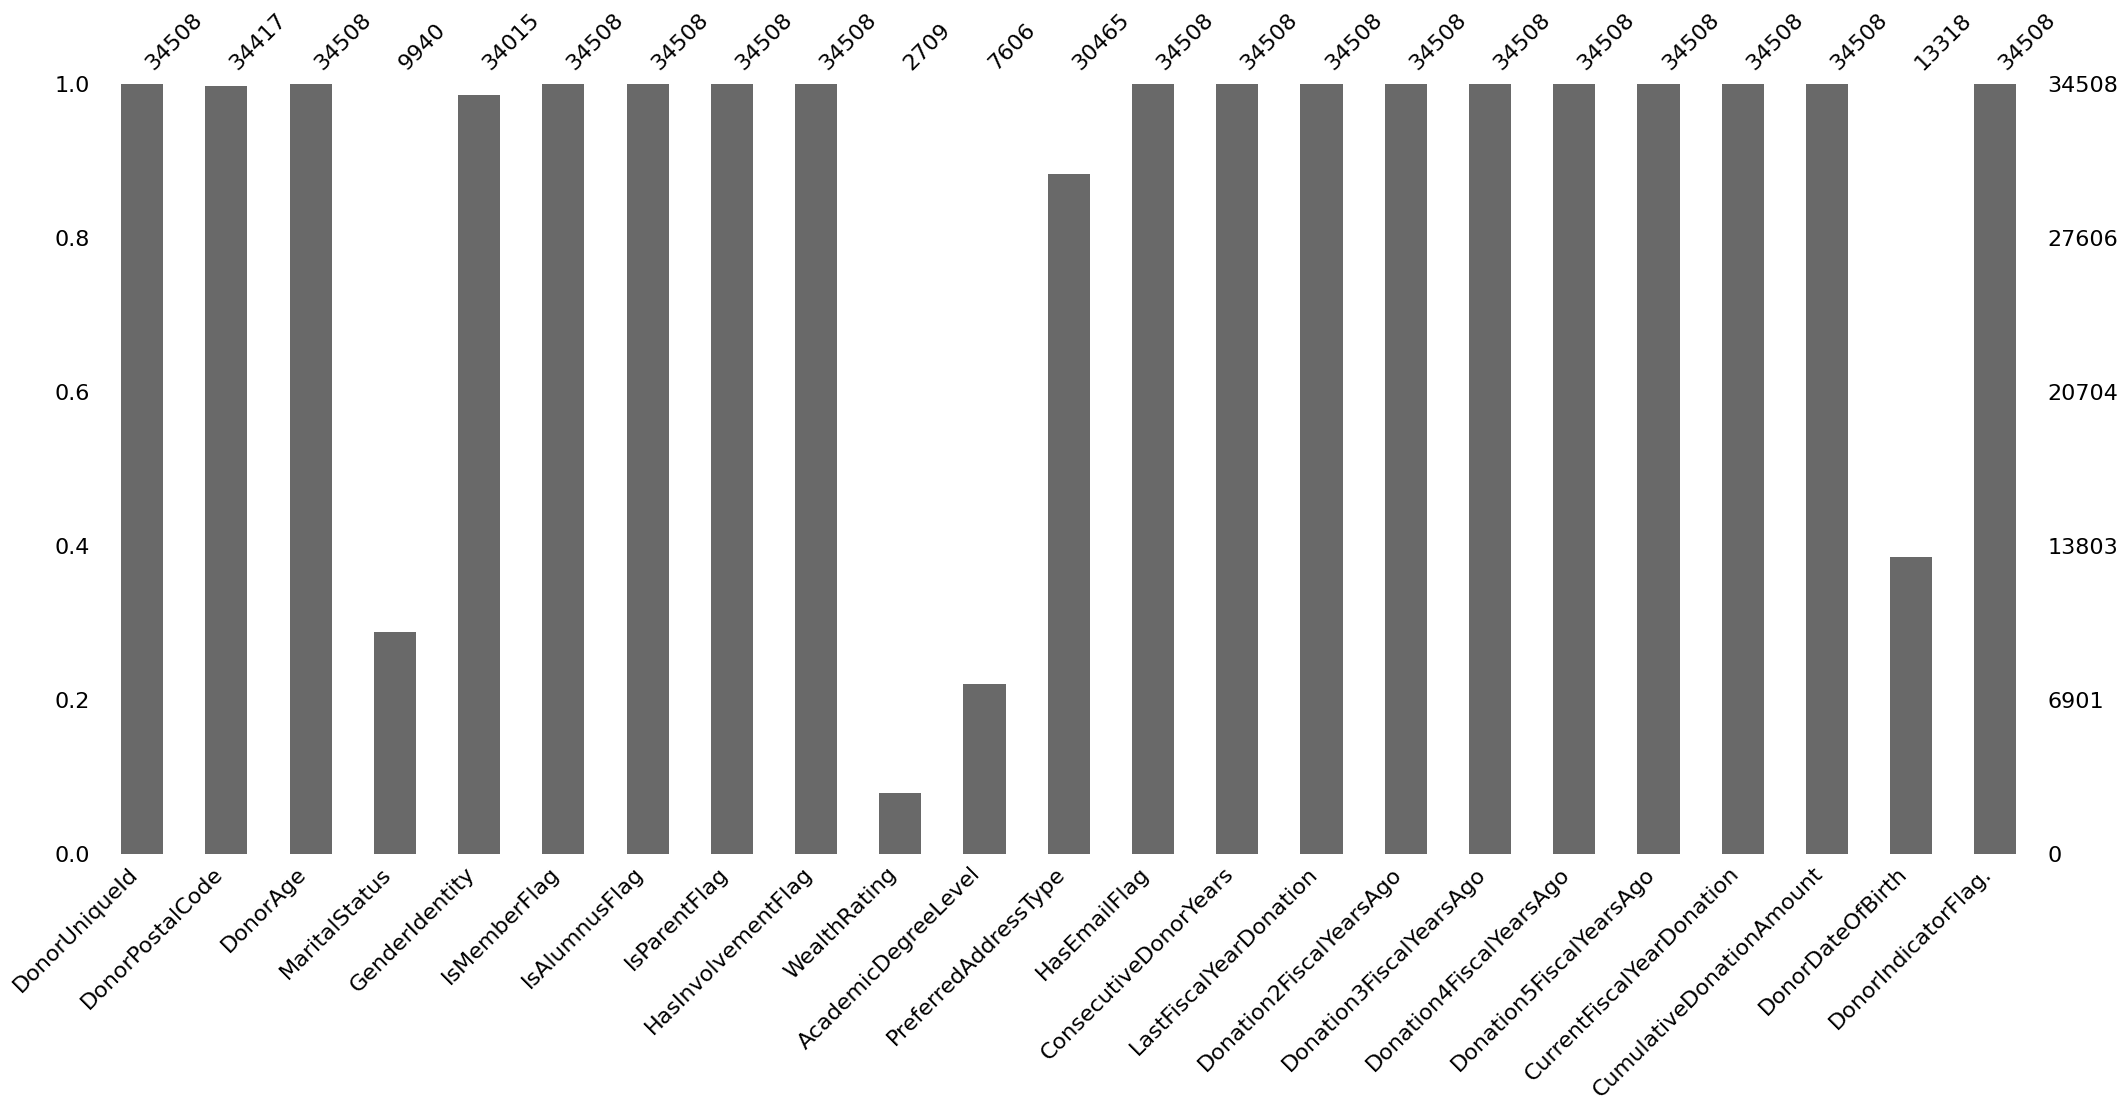

In [5]:
#code snippet 4
#identifying missing data
import missingno as msno
msno.bar(df)

In [6]:
#code snippet 5
# Libraries to help with reading and manipulating data
import numpy as np
import random
import requests
from io import StringIO


In [7]:
#Code snippet 6
# Setting Zip as integer to remove decimal then converting it to string with 5 places
df2 = df[df['DonorPostalCode'].notna()]



In [8]:
#Code snippet 7
# Setting Zip as integer to remove decimal then converting it to string with 5 places
df2['DonorPostalCode'] = df2['DonorPostalCode'].astype('int').astype(str).str.zfill(5)

<ipython-input-8-b5f83f7af672>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DonorPostalCode'] = df2['DonorPostalCode'].astype('int').astype(str).str.zfill(5)


In [9]:
#Code snippet 8
#installing zipcodes to map postal code to specific regions
!pip install zipcodes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.7/726.7 kB 14.3 MB/s eta 0:00:00


In [10]:
#Code snippet 9
#importing zipcodes and mapping postal codes to States and Cities
import zipcodes

# Iterate through the zip column in df2
for index, row in df2.iterrows():
    zipcode = row["DonorPostalCode"]

    # Get zipcode details
    zipcode_data = zipcodes.matching(zipcode)

    # Extract state and city if found
    if zipcode_data:
        state = zipcode_data[0]['state']
        city = zipcode_data[0]['city']
    else:
        state = "None"
        city = "None"

    df2.loc[index, "STATE"] = state
    df2.loc[index, "CITY"] = city # Adding city information as well


<ipython-input-10-a9e9f34206fa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[index, "STATE"] = state
<ipython-input-10-a9e9f34206fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[index, "CITY"] = city # Adding city information as well


In [11]:
# Code snippet 10
# Showing the remapped regions
df2[['DonorPostalCode','CITY', 'STATE']]

,DonorPostalCode,CITY,STATE
0,23187,Williamsburg,VA
1,77643,Port Arthur,TX
3,47141,Marysville,IN
4,92555,Moreno Valley,CA
5,95191,San Jose,CA
...,...,...,...
34503,07848,Lafayette,NJ
34504,28275,Charlotte,NC
34505,42539,Liberty,KY
34506,32733,Goldenrod,FL


In [12]:
# prompt: use df2 as the dataset and CITY, STATE, DonorPostalCode as the column - show Donorpostalcode where city or state value is none

# Display DonorPostalCode where CITY or STATE is None
result = df2[(df2['CITY'] == 'None') | (df2['STATE'] == 'None')] [['DonorPostalCode','CITY']]
result


,DonorPostalCode,CITY
43,00643,None
54,68782,None
62,75255,None
77,94096,None
85,89779,None
...,...,...
34335,40592,None
34364,94029,None
34378,25914,None
34379,67233,None


In [13]:
#code snippet 11
# prompt: for columns 'LastFiscalYearDonation', 'Donation2FiscalYearsAgo','Donation3FiscalYearsAgo','Donation4FiscalYearsAgo','Donation5FiscalYearsAgo','CurrentFiscalYearDonation', drop the decimal point, and the $ in front

columns_to_clean = ['LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
                   'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
                   'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation']

for column in columns_to_clean:
  df2[column] = df2[column].str.replace('$', '', regex=False)
  df2[column] = df2[column].str.replace('.00', '', regex=False)
  df2[column] = pd.to_numeric(df2[column], errors='coerce')
  df2[column] = df2[column].fillna(0).astype(int)
df2

<ipython-input-13-860e8f7a6de4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = df2[column].str.replace('$', '', regex=False)
<ipython-input-13-860e8f7a6de4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = df2[column].str.replace('.00', '', regex=False)
<ipython-input-13-860e8f7a6de4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.,STATE,CITY
0,1,23187,42,Married,Female,N,N,N,N,NaN,...,0,0,0,0,0,10.0,NaN,Y,VA,Williamsburg
1,2,77643,33,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,2100.0,6/16/1985,Y,TX,Port Arthur
3,4,47141,31,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0.0,12/3/1987,N,IN,Marysville
4,5,92555,68,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,505.0,9/11/1950,Y,CA,Moreno Valley
5,6,95191,57,NaN,Male,N,N,N,N,NaN,...,0,0,0,0,0,0.0,1/23/1961,N,CA,San Jose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,07848,42,NaN,Female,N,N,N,N,NaN,...,0,0,0,0,0,0.0,NaN,N,NJ,Lafayette
34504,34505,28275,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,0,0,0,0,80.0,9/23/1994,Y,NC,Charlotte
34505,34506,42539,27,NaN,Female,N,Y,N,Y,NaN,...,0,0,0,0,0,0.0,1/3/1991,N,KY,Liberty
34506,34507,32733,46,Married,Female,N,N,N,Y,NaN,...,0,0,120,0,0,120.0,5/11/1972,Y,FL,Goldenrod


In [14]:
#code snippet 12
# prompt: for column CumulativeDonationAmount, drop the decimal point

df2['CumulativeDonationAmount'] = df2['CumulativeDonationAmount'].astype(str).str.replace('.', '')


<ipython-input-14-b0cf060988a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CumulativeDonationAmount'] = df2['CumulativeDonationAmount'].astype(str).str.replace('.', '')


In [15]:
#code snippet 13
#showing unique values for wealth rating
df2['WealthRating'].unique()

array([nan, '$50,000-$99,999', '$100,000-$249,999', '$25,000-$49,999',
       '$250,000-$499,999', '$1-$24,999', '$1,000,000-$2,499,999',
       '$500,000-$999,999', '$2,500,000-$4,999,999'], dtype=object)

In [16]:
#code snippet 14
# prompt: for column 'WealthRating', map 1 for '$1-$24,999', 2 for '$25,000-$49,999', 3 for $50,000-$99,999, 4 for $100,000-$249,999, 5 for $250,000-$499,999, 6 for $500,000-$999,999, 7 for $1,000,000-$2,499,999, 8 for $2,500,000-$4,999,999

# Create a mapping dictionary for WealthRating
wealth_rating_mapping = {
    '$1-$24,999': 1,
    '$25,000-$49,999': 2,
    '$50,000-$99,999': 3,
    '$100,000-$249,999': 4,
    '$250,000-$499,999': 5,
    '$500,000-$999,999': 6,
    '$1,000,000-$2,499,999': 7,
    '$2,500,000-$4,999,999': 8
}

# Map the WealthRating column using the mapping dictionary
df2['WealthRating'] = df2['WealthRating'].map(wealth_rating_mapping)

df2['WealthRating'].unique()

<ipython-input-16-fcae921c754c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['WealthRating'] = df2['WealthRating'].map(wealth_rating_mapping)


array([nan,  3.,  4.,  2.,  5.,  1.,  7.,  6.,  8.])

In [17]:
#code snippet 15
#exporting df to csv file
df2.to_csv('Redcross project0404_1.csv', index=False)

In [18]:
#Code snippet 16
#installing ydata for EDA report
!pip install ydata-profiling



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=991036e78e195fdd9f12f6d6d287825502edee54390618feb0c97e05f5d8231c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [19]:
#code snippet 17
#drop wealthrating 'DonorUniqueId','DonorPostalCode','DonorDateOfBirth','CumulativeDonationAmount' ,'IsMemberFlag'
df2 = df2.drop(['DonorUniqueId','DonorPostalCode','DonorDateOfBirth' ,'IsMemberFlag', 'WealthRating', 'CITY', 'STATE'], axis=1)

In [20]:
#Code snippet 18
from ydata_profiling import ProfileReport

profile = ProfileReport(df2, title="Redcross project EDA report2025_1", explorative=True)
profile.to_file("Redcross project EDA report2025_1.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:03<00:00,  5.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]